<div style="border-radius: 15px; border: 3px solid navy; padding: 15px; ">
<b> Привет, Надежда! Меня зовут Денис Иванов. </b> 
<br> Сегодня я буду проверять твой проект. Попробую помочь тебе сделать его еще лучше!
<br> Если не против, то дальнейшее общение будет проходить на «ты». Если это неприемлемо, то обязательно напиши мне в комментариях — мы перейдем на «вы».
<br> Также сразу хочу обратить внимание на цветовую разметку.
    
<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>Комментарий ревьюера:</b>

✔️ Так обозначены отличные решения и идеи, которые можно использовать в будущем.
</div>
    
<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>Комментарий ревьюера:</b>
    
⚠️ Так обозначено то, что можно сделать лучше или оптимизировать.
</div>    
    
<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>Комментарий ревьюера:</b>
    
❌ Так  обозначено то, что требует исправления. Работа не может быть принята с красными комментариями.
</div>
    
<br> Пожалуйста, не перемещай, не изменяй и не удаляй мои коментарии, так как они повышают качество повторного ревью.
<br> Желательно реагировать на каждый мой комментарий ('исправил', 'не понятно как исправить ошибку', ...)
    
<br> Также будет очень хорошо, если ты будешь помечать свои действия следующим образом.
    
<div class="alert alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>Комментарий студента:</b> ...
</div>
    
<hr style="border-width: 3px;">
    
<b>Полезные ссылки:</b>

* Если тебя заинтересовал процесс создания и применения нейронных сетей, то могу предложить обратить внимание на следующие курсы: 
    - <a href='https://stepik.org/course/401/info'>Нейронные сети</a> — математика и  алгоритмы, лежащие в основе обучения нейронных сетей,
    - <a href='https://dls.samcs.ru'>DLS</a> — теория и практика глубокого обучения и нейронных сетей на PyTorch.
* Если удобнее читать, то вот довольно познавательная книга <a href='https://vk.com/wall-203365865_1152'>«PyTorch. Освещая глубокое обучение»</a>.
    
<hr style="border-width: 3px;">
    
<b>Общее впечатление</b>
* Большое спасибо за проделанную работу.
* Радует, что проект хорошо структурирован.
* Я оставил несколько советов. Пожалуйста, обрати на них внимание.
* Проект принят.
</div>

# Определение возраста покупателей

## Исследовательский анализ данных

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd# < Перенесите сюда исследовательский анализ данных >

In [2]:
# Загружаем данные
labels = pd.read_csv('/datasets/faces/labels.csv')
labels.head()

,file_name,real_age
0,000000.jpg,4
1,000001.jpg,18
2,000002.jpg,80
3,000003.jpg,50
4,000004.jpg,17


In [3]:
# Проверяем информацию по данным
labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7591 entries, 0 to 7590
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   file_name  7591 non-null   object
 1   real_age   7591 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 118.7+ KB


In [4]:
# Пропусков нет, только 2 признака: название файла и возраст,
# проверим максимальный возраст
labels.describe()

,real_age
count,7591.000000
mean,31.201159
std,17.145060
min,1.000000
25%,20.000000
50%,29.000000
75%,41.000000
max,100.000000


<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>Комментарий ревьюера:</b>

✔️ Молодец, что не забываешь о методах первичного анализа данных. Знание статистик данных позволяет работать с ними более продуктивно.
</div>

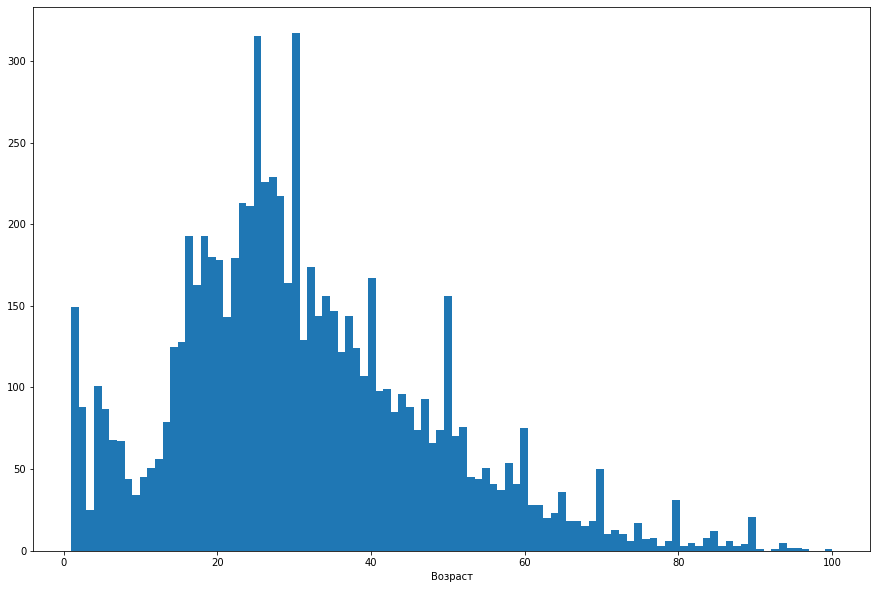

In [5]:
# Построем гистограмму по возрастам, за кол-во корзин возмем максимальный возраст
fig, ax = plt. subplots(figsize=(15,10))
ax.hist(labels['real_age'], bins=100)
ax.set_xlabel('Возраст')
plt.show()

<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>Комментарий ревьюера:</b>

⚠️ Подумай, как текущее распределение возраста может сказаться на качестве обучения?   
</div>   

In [6]:
# Гистограмму построили, выводы по ней сделаем позже
# Сейчас загрузим наши изображения
train_datagen = ImageDataGenerator(rescale=1./255)
foto_flow = train_datagen.flow_from_dataframe(
        dataframe=labels,
        directory='/datasets/faces/final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        class_mode='raw',
        seed=12345) 

Found 7591 validated image filenames.


<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>Комментарий ревьюера:</b>
    
⚠️ `ImageDataGenerator` инициализирован верно, однако обрати внимание на наименование переменных:
- `train_gen_flow` — данное название наводит на мысль о тренировочной выборке, что в дальнейшем может запутать как и тебя, так и читающего твой код коллегу. Не стоит забывать, что основной принцип хорошего именования — имена должны быть содержательными (полностью отражать своё назначение).
</div>

<div class="alert alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>Комментарий студента:</b> Исправила!
</div>

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>Комментарий ревьюера 2:</b>

✔️ Ок. Смотри, переменную `train_datagen` тоже имеет смысл переименовать.
</div>

In [7]:
# Посмотрим на выборку
features, target=next(foto_flow)
print(features.shape)

(32, 224, 224, 3)


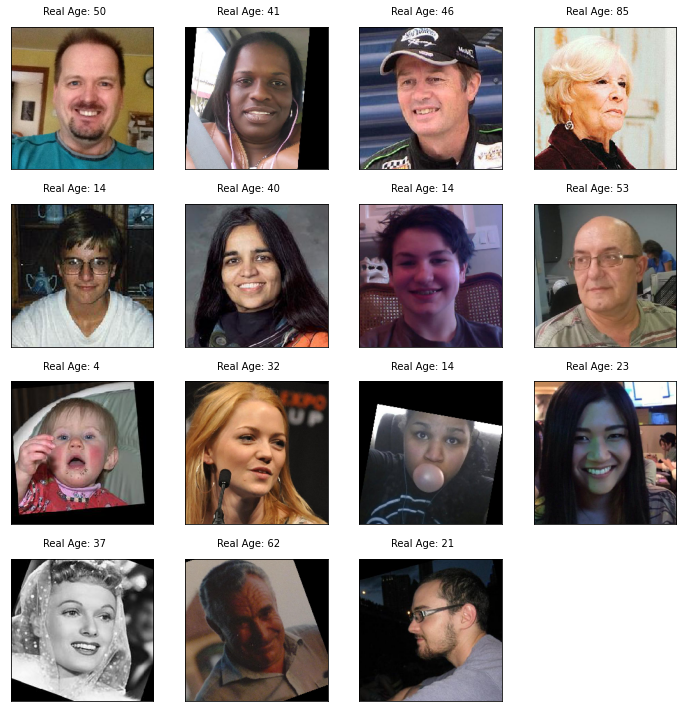

In [8]:
# Выведем 15 изображений и подпишем их возраст
fig=plt.figure(figsize=(10, 10))
for i in range(15):
    fig.add_subplot(4,4,i+1)
    plt.imshow(features[i])
    plt.xticks([])
    plt.yticks([])
    plt.tight_layout()
    plt.text(50, -20, f"Real Age: {target[i]}", fontsize=10)

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>Комментарий ревьюера:</b>

✔️ Изображения выведены. Отлично, что в `title` указан возраст, так сразу можно оценить корректность разметки.
</div>

ВЫВОД: В нашем датасете всего 7591 изображение. Пропусков нет, дубликаты смотреть нет смысла. Максимальный возраст 100 лет, минимальный 1 год. Если анализировать гистограмму, то можно увидеть пики на "юбилейных" годах( 1, 20, 40, 80, ...). Из этого можно сделать вывод, что возраст могли округлять. Также изображений 30-летних большинство, на эти года идет "скачок".

Что можно сказать о самих изображениях, в нашей подборке все фотографии крупным планом, их расположение не всегда корректное( сдвиги по оси у влево и вправо), изображения есть и черно-белые, и цветные. Сами лица на фотографиях могут быть в профиль, что немного затрудняет разметку, так и в анфас. На данной выборке нет неверной разметки изображения в плане возраста( младенцу не присвоен возраст пенсионера и т.д.)

Перейдем к объемам данных. Обратим внимание, что соблюден баланс классов. Самих данных, а имеено их кол-во , скорее всего будет недостаточно для обучения модели, поэтому придется применить метод аугментации для дополнения набора обучающих данных и для лучшей производительности модели.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>Комментарий ревьюера:</b>

✔️ Верные наблюдения и хороший вывод. Т.к аномалии присутствуют в годах кратных 5, т.о. имеет смысл предположение, что разметка была сделана руками и возраст определялся не точно.
</div>

## Обучение модели

Перенесите сюда код обучения модели и её результат вывода на экран.


(Код в этом разделе запускается в отдельном GPU-тренажёре, поэтому оформлен не как ячейка с кодом, а как код в текстовой ячейке)

```python

from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
 # Загрузка данных обучения
def load_train(path):

    print('*' * 80)
    print(path)
    print('*' * 80)

    labels_df = pd.read_csv(path + 'labels.csv')

    # Создание объекта ImageDataGenerator для аугментации данных обучения
    train_datagen = ImageDataGenerator(
        validation_split=0.25,
        rescale=1./255,
        horizontal_flip=True,
        height_shift_range=0.1,
        width_shift_range=0.1)

    # Создание генератора потоков данных для обучения
    train_datagen_flow = train_datagen.flow_from_dataframe(
        dataframe=labels_df,
        directory=path + 'final_files',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        class_mode="raw",
        subset='training',
        seed=12345
    )

    return train_datagen_flow

def load_test(path):
    # Загрузка данных тестирования
    labels_df = pd.read_csv(path + 'labels.csv')

    # Создание объекта ImageDataGenerator для предобработки данных тестирования
    validation_datagen = ImageDataGenerator(
        validation_split=0.25,
        rescale=1./255)

    # Создание генератора потоков данных для тестирования
    val_datagen_flow = validation_datagen.flow_from_dataframe(
        dataframe=labels_df,
        directory=path + 'final_files',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        class_mode="raw",
        subset='validation',
        seed=12345)

    return val_datagen_flow

def create_model(input_shape):
    # Создание модели с использованием архитектуры ResNet50
    backbone = ResNet50(input_shape=input_shape,
                        weights='/datasets/keras_models/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5',
                        include_top=False)

    # Добавление слоев модели
    model = Sequential()
    model.add(backbone)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(1, activation='relu'))

    # Компиляция модели
    optimizer = Adam(lr=0.0001)
    model.compile(optimizer=optimizer,
                  loss='mse',
                  metrics=['mae'])

    return model

def train_model(model, train_data, test_data, batch_size=None, epochs=15,
               steps_per_epoch=None, validation_steps=None):

    history = model.fit(train_data,
                    validation_data=test_data,
                    batch_size=batch_size, epochs=epochs,
                    steps_per_epoch=steps_per_epoch,
                    validation_steps=validation_steps,
                    verbose=2, shuffle=True)

    return model

```

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>Комментарий ревьюера:</b>

✔️ Архитектура сети и функция обучения определены верно.
</div>

```

Train for 178 steps, validate for 60 steps
Epoch 1/15
2023-07-10 08:17:12.986000: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2023-07-10 08:17:14.674949: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudnn.so.7
178/178 - 247s - loss: 232.9468 - mae: 10.9819 - val_loss: 1024.4098 - val_mae: 27.3349
Epoch 2/15
178/178 - 91s - loss: 89.4582 - mae: 7.0680 - val_loss: 484.7280 - val_mae: 16.6673
Epoch 3/15
178/178 - 93s - loss: 67.5910 - mae: 6.2666 - val_loss: 221.2172 - val_mae: 11.3423
Epoch 4/15
178/178 - 100s - loss: 52.2070 - mae: 5.5332 - val_loss: 106.1004 - val_mae: 7.7434
Epoch 5/15
178/178 - 101s - loss: 45.0477 - mae: 5.1322 - val_loss: 79.4190 - val_mae: 6.6244
Epoch 6/15
178/178 - 100s - loss: 38.6948 - mae: 4.7673 - val_loss: 96.7718 - val_mae: 7.3037
Epoch 7/15
178/178 - 93s - loss: 32.5711 - mae: 4.4033 - val_loss: 69.1686 - val_mae: 6.1025
Epoch 8/15
178/178 - 92s - loss: 27.6008 - mae: 4.0519 - val_loss: 66.1045 - val_mae: 5.9941
Epoch 9/15
178/178 - 88s - loss: 24.1799 - mae: 3.7962 - val_loss: 65.9482 - val_mae: 6.0845
Epoch 10/15
178/178 - 90s - loss: 20.7873 - mae: 3.5200 - val_loss: 68.6215 - val_mae: 6.3726
Epoch 11/15
178/178 - 95s - loss: 19.2487 - mae: 3.3825 - val_loss: 70.1529 - val_mae: 6.1497
Epoch 12/15
178/178 - 94s - loss: 18.0902 - mae: 3.2854 - val_loss: 70.1389 - val_mae: 6.4682
Epoch 13/15
178/178 - 90s - loss: 15.5220 - mae: 3.0348 - val_loss: 67.5573 - val_mae: 6.0184
Epoch 14/15
178/178 - 88s - loss: 13.8171 - mae: 2.8558 - val_loss: 67.9048 - val_mae: 6.2170
Epoch 15/15
178/178 - 88s - loss: 13.6194 - mae: 2.8370 - val_loss: 68.6715 - val_mae: 6.0988
WARNING:tensorflow:sample_weight modes were coerced from
  ...
    to  
  ['...']
60/60 - 9s - loss: 68.6715 - mae: 6.0988
Test MAE: 6.0988


```

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>Комментарий ревьюера:</b>

✔️ Цель достигнута. В статье о датасете, с которым мы работаем, значение MAE равно 5.4, поэтому тобой получены достаточно хорошие результаты.
</div>

## Анализ обученной модели

Итак, анализ показал, что обученная модель на основе ResNet50 с полученной метрикой **МАЕ = 6.0988** способна выполнять свою задачу, а именно достаточно точно определять возраст. Мы использовали предворительно обученную сеть ResNet50 с начальными случайными весами без замораживания "верхушки",кол-во эпох взяли равную 15. Данная модель была удачной, так как переобучения не было замечено. 

* Какие задачи способна выполнять обученная нами модель:
- Модель может быть использована для анализа возраста покупателей и предлагать товары, которые могут быть интересны потенциальным покупателям данной возрастной группой. Но так как модель не исключает ошибки( МАЕ равна 6.0988 ), то для более точного определения возраста требуется настройка модели и детальный подбор параметров.

- Контроль при продаже алкоголя и проверка кассиров соблюдения правил его продажи. Однако наличие ошибки может повлиять на некорректное определение возраста покупателя( вместо 18 лет модель может определить 17, что уже ограничивает покупку алкоголя). Для более точно работы нашей модели опять же требуется детальный подбор параметров. 


<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>Комментарий ревьюера:</b>

✔️ Верно. С учетом полученных результатов можно рекомендовать использовать данную модель для выполнения первой поставленной задачи — анализировать покупки и предлагать товары, которые могут заинтересовать покупателей определенной возрастной группы при предварительной категоризации потенциальных покупателей на, например, следующие возрастные категории:

- дети;
- юноши;
- молодые люди;
- покупатели среднего возраста;
- пожилые.

Что касается второй задачи — контролировать добросовестность кассиров при продаже алкоголя — с учетом полученного MAE, модель не покажет хороших результатов на практике.
</div>

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>Комментарий ревьюера:</b>

✔️ Если есть вопросы, то можешь задать их, если нет, то присылай назад и я приму проект.
</div>

<div class="alert alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>Комментарий студента:</b> 
    Привет! спасибо большое за твои комментарии, если не сложно, поясни такие моменты( заранее прости, если вопросы покажутся глупыми)): Когда стоит замораживать ту самую верхушку у уже предобученной модели, как например ResNet50? И на практике в бизнесе, например, как я пойму, что мой показатель МАЕ преемлем для модели, или в случае нейроных сетей нам нужно максимально приблизиться к 0?
</div>

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>Комментарий ревьюера 2:</b>

✔️ Не бывает глупых вопросов. Если что-то непонятно или хочется уточнения, то вопросы всегда уместны.
    
    
* Смотри, замораживание верхней части модели может быть полезным в случаях, когда есть ограниченный объем данных или недостаточно вычислительных ресурсов для обучения всей модели с нуля. Однако, если есть достаточно большой датасет, то можно разморозить и дообучить все слои модели. Это может помочь модели лучше адаптироваться к конкретному набору данных и повысить точность предсказания.
    
* Максимально приблизиться к *0* — практически не решаемая задача в текущих реалиях. Обычно, на практике, о всех метриках качества договариваются заранее исходя из потребностей бизнеса, наличия репрезентативного датасета и возможностей текущих <a href='https://deci.ai/blog/sota-dnns-overview/'>State of the art</a> алгоритмов.  
    
</div>

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>Комментарий ревьюера 2:</b>

✔️ Проект принят. Удачи в дальнейшей учебе!  
</div>

## Чек-лист

- [x]  Jupyter Notebook открыт
- [ ]  Весь код выполняется без ошибок
- [ ]  Ячейки с кодом расположены в порядке исполнения
- [ ]  Исследовательский анализ данных выполнен
- [ ]  Результаты исследовательского анализа данных перенесены в финальную тетрадь
- [ ]  MAE модели не больше 8
- [ ]  Код обучения модели скопирован в финальную тетрадь
- [ ]  Результат вывода модели на экран перенесён в финальную тетрадь
- [ ]  По итогам обучения модели сделаны выводы